## Import

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
path = '/Users/markhinojosa/coffee-shop/Raw Data/ORDERS.csv'

In [25]:
ordersDF = pd.read_csv(path)
ordersDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Order ID     1000 non-null   object
 1   Order Date   1000 non-null   object
 2   Customer ID  1000 non-null   object
 3   Product ID   1000 non-null   object
 4   Quantity     1000 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 39.2+ KB


## Nulls

In [26]:
ordersDF.isnull().sum()

Order ID       0
Order Date     0
Customer ID    0
Product ID     0
Quantity       0
dtype: int64

## Grouping

In [73]:
ordersDF[['Order ID', 'Product ID']].groupby(['Product ID']).count().head()

,Order ID
Product ID,
A-D-0.2,27
A-D-0.5,23
A-D-1,16
A-D-2.5,20
A-L-0.2,17


In [79]:
ordersDF[['Product ID', 'Quantity']].groupby(['Product ID']).sum().head()

,Quantity
Product ID,
A-D-0.2,97
A-D-0.5,89
A-D-1,49
A-D-2.5,76
A-L-0.2,50


## Converting and Adding Columns

In [30]:
ordersDF['Order Date'] = pd.to_datetime(ordersDF['Order Date'])

In [35]:
ordersDF['month'] = ordersDF['Order Date'].dt.month

In [80]:
ordersDF.head()

,Order ID,Order Date,Customer ID,Product ID,Quantity,month
0,QEV-37451-860,2019-09-05,17670-51384-MA,R-M-1,2,9
1,QEV-37451-860,2019-09-05,17670-51384-MA,E-M-0.5,5,9
2,FAA-43335-268,2021-06-17,21125-22134-PX,A-L-1,1,6
3,KAC-83089-793,2021-07-15,23806-46781-OU,E-M-1,2,7
4,KAC-83089-793,2021-07-15,23806-46781-OU,R-L-2.5,2,7


In [77]:
avgSalesPerMonthDF = ordersDF[['month', 'Quantity']].groupby(['month']).sum()

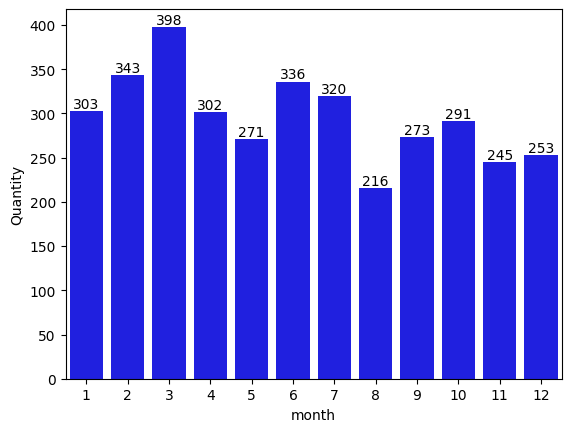

In [78]:
barGraph = sns.barplot(
            x='month', 
            y='Quantity', 
            color='blue',
            data=avgSalesPerMonthDF, 
            linewidth=0)

for i in barGraph.containers:
    barGraph.bar_label(i,)
    
plt.show()